In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Ising import Lattice

In [74]:
[Ms, Chis, Es, Cs] = np.load('data/crit_data.npz')['stats']
[M_errs, Chi_errs, E_errs, C_errs] = np.load('data/crit_data.npz')['errs']
print(M_errs)

[5.71712500e-05 1.03067071e-04 2.70452527e-04 1.24149202e-03
 1.50685662e-03 1.94667810e-03 1.87945397e-03 2.10825236e-03
 2.98080435e-03 4.53835378e-03 4.70950850e-03 5.00962761e-03
 4.91709788e-03 1.17575548e-02 2.48670968e-02 2.63174505e-02
 3.90276625e-02 1.01876127e-01 1.35865504e-01 1.27532646e-01
 8.27122955e-02 7.22121604e-02 5.61669077e-02 3.87592963e-02
 3.19675324e-02 2.60997596e-02 1.55501577e-02 1.28769048e-02
 1.39233167e-02 1.12057519e-02 1.07426758e-02 8.81414843e-03
 8.92334160e-03 7.77467342e-03 7.34441831e-03 3.14088610e-03
 1.73038474e-03 1.44883894e-03]


In [4]:
def power_sing(T, alpha, a):
    return T ** alpha * a

def lin_fit(T, alpha, a):
    return T * alpha + a

# Susceptibility

[-1.73085574  0.09829959]
0.1689013619287411


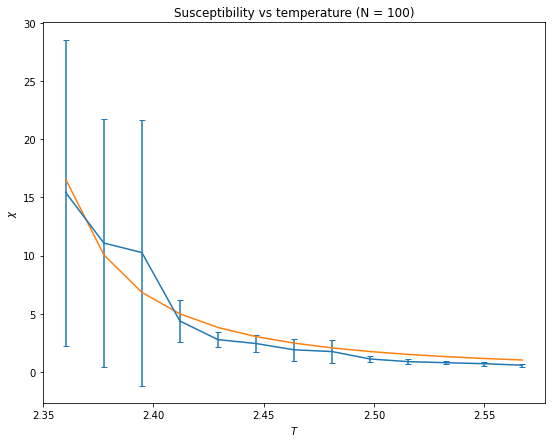

In [111]:
T_l, T_h = 2.05, 2.55
T_steps = 30
Ts = np.concatenate((np.linspace(1.3, T_l, 4), np.linspace(T_l, T_h, T_steps), np.linspace(T_h, 3.2, 4)))

max = np.argmax(Chis)
T_c = Ts[max]
s = slice(4, max-2)
T_range = np.abs(Ts[s] - T_c)
Chi_range = Chis[s]
Chi_err_range = Chi_errs[s]

bounds_gamma = ([-3, -5], [0, 20])
fit, fit_err = curve_fit(power_sing, T_range, Chi_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, Chi_range, Chi_err_range, capsize=3)
Chi_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, Chi_pred)

ax.set_title("Susceptibility vs temperature (N = 100)")
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")
fig.set_size_inches(9, 7)

# Specific heat

[-0.29648953  0.58021454]
0.02011259733959575


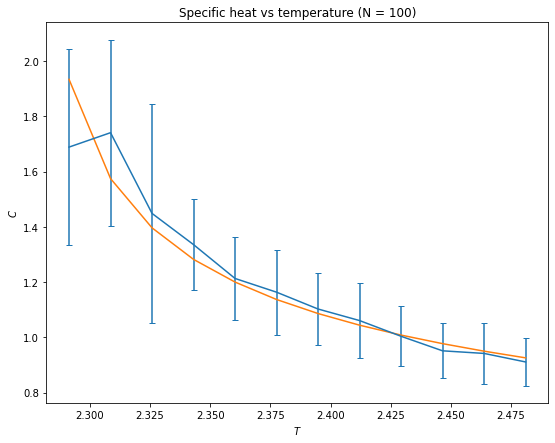

In [117]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(max+1, -8)
T_range = np.abs(Ts[s] - T_c)
C_range = Cs[s]
C_err_range = C_errs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(power_sing, T_range, C_range, bounds=bounds_gamma, sigma=C_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, C_range, C_err_range, capsize=3)
C_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, C_pred)

ax.set_title("Specific heat vs temperature (N = 100)")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")
fig.set_size_inches(9, 7)

[-0.28531858 -0.51336309]
0.022803816723616904


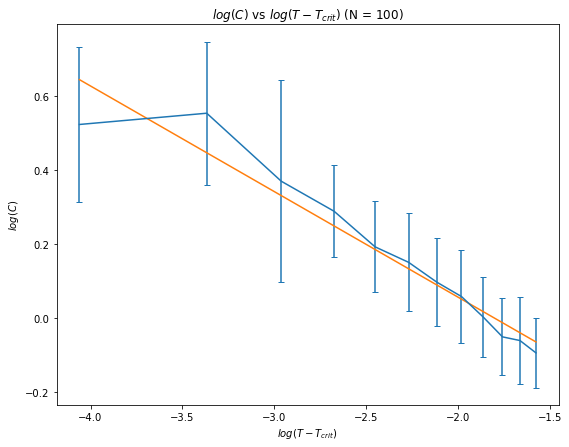

In [116]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(max+1, -8)
T_range = np.abs(Ts[s] - T_c)
T_log = np.log(T_range)
C_log = np.log(Cs[s])
C_log_err = C_errs[s]/Cs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(lin_fit, T_log, C_log, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_log, C_log, C_log_err, capsize=3)
C_pred = lin_fit(T_log, gamma, a)
ax.plot(T_log, C_pred)

ax.set_title("$log(C)$ vs $log(T-T_{crit})$ (N = 100)")
ax.set_xlabel("$log(T - T_{crit})$")
ax.set_ylabel("$log(C)$")
fig.set_size_inches(9, 7)

# Magnetisation

[0.12508973 1.07964532]
0.002139222185580408


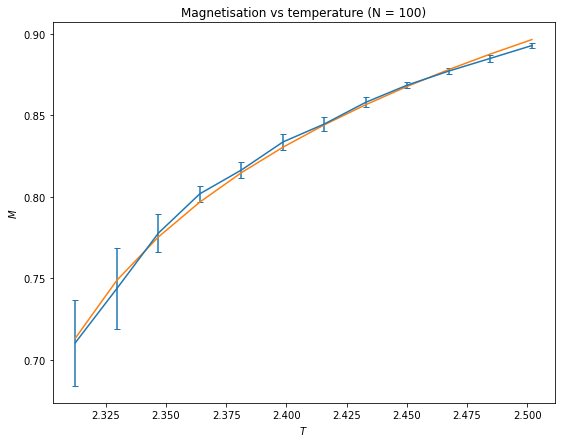

In [118]:
T_c = 2.276
s = slice(4, 16)
T_range = np.abs(Ts[s] - T_c)
M_range = Ms[s]
M_err_range = M_errs[s]

bounds_gamma = ([0, -5], [0.2, 20])
fit, fit_err = curve_fit(power_sing, T_range, M_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, M_range, M_err_range, capsize=3)
M_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, M_pred)

ax.set_title("Magnetisation vs temperature (N = 100)")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
fig.set_size_inches(9, 7)

# Critical Isotherm

In [112]:
K = 15
n = 300
H_min = 0.005
H_max = 0.35
H_steps = 20
H_range = np.geomspace(H_min, H_max, H_steps)
T_c = 2.286

bounds_alpha0 = ([2.26, 1, -10, -10], [2.4, 2, 10, 10])
bounds_alpha = ([0, 0], [0.1, 10])

l = Lattice(100, K=K)
Ms, M_errs = [], []
for H in H_range:
    stat, err = l.stats(n, T_c, H=H, t0=100)
    Ms.append(stat[0]), M_errs.append(err[0])
[alpha, _], err = curve_fit(power_sing, H_range, Ms, bounds=bounds_alpha, sigma=M_errs)
alpha_err = np.sqrt(err[0,0])

print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

np.savez('data/delta_data.npz', H_range=H_range, Ms=Ms, M_errs=M_errs)

alpha = 0.06521078079867745 +/- 0.0008350129079403416
delta = 15.33488769421821 +/- 0.19636061721173875


a = 0.9875873605266765 +/- 0.0015268542066028746
alpha = 0.06642424238910322 +/- 0.0008494064041879023
delta = 15.054744533511583 +/- 0.19251399730342028


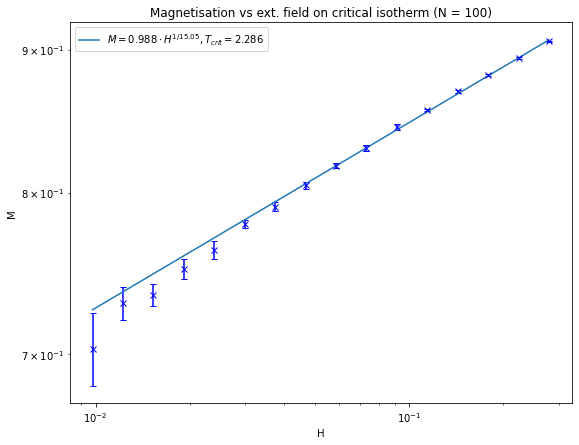

In [124]:
s = slice(3, -1)
H_range=np.load('data/delta_data.npz')['H_range'][s]
Ms=np.load('data/delta_data.npz')['Ms'][s]
M_errs=np.load('data/delta_data.npz')['M_errs'][s]


bounds_alpha = ([0, 0], [0.1, 10])
[alpha, a], err = curve_fit(power_sing, H_range, Ms, bounds=bounds_alpha, sigma=M_errs)
alpha_err = np.sqrt(err[0,0])
a_err = np.sqrt(err[1,1])

print(f'{a = } +/- {a_err}')
print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

fig, ax = plt.subplots()
ax.errorbar(H_range, Ms, M_errs, capsize=3, fmt="bx")
ax.plot(H_range, power_sing(H_range, alpha, a))
ax.set_title("Magnetisation vs ext. field on critical isotherm (N = 100)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("H")
ax.set_ylabel("M")

ax.legend(["$M = 0.988\cdot H^{1/15.05},  T_{crit} = 2.286$"])
fig.set_size_inches(9, 7)
plt.savefig(r"Pics/delta2d.png", format="png", dpi=1200, bbox_inches='tight')